# Dataset Overview Section
Dataset Overview:

The Dairy Goods Sales Dataset is original collected from Kaggle and in the public domain under CC0 License, which means it can be used in any way one wishes to without copyright remit. It holds data about dairy farms, products, sales, and inventory from year 2019 to 2022 related to selected dairy brands of India. Some of the elements are the geographical location of the farms, products offered, price, sales outlets, stock amount, and the regions of the customers.
This type of data set is highly suitable for conducting seasonal sales analysis, product price elasticity demonstration, company regional performance examination, and stock management in the dairy industry.

Dataset link: https://www.kaggle.com/datasets/suraj520/dairy-goods-sales-dataset

License: CC0 1.0 Universal (Public Domain Dedication)

**Features:**

- Farm Data: Location, land area, farm size, cow population.
- Product Details: Product ID, name, brand, production/expiration dates, shelf life, quantity, price, storage conditions.
- Sales Metrics: Sold quantities, sales revenue, customer location, sales channel, stock levels, thresholds, reorder quantities.

**Use-Cases:**
- Analyze farm performance, sales trends, and customer preferences.
- Study storage and shelf life impacts on product quality.
- Optimize inventory and demand forecasting.
- Research market trends and pricing strategies.

### Data Cleaning with Updated Methods
Ensure all warnings are addressed and the dataset is clean for further processing.

## Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

#### Loading and Exploring Data

In [40]:
# Load dataset
data = pd.read_csv("dairy_dataset.csv")

In [41]:
# Show basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

In [42]:
# Inspect the first few rows
data.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


Highlight Key Insights:

Product Demand: Identify which products are in high demand each month.
Sales Performance: Show how pricing affects the quantity sold and total revenue.
Inventory Management: Focus on products with low stock and reorder quantities.
Simplify Visualizations:

Seasonal Demand: Use a line plot to show how demand changes by month for specific products.
Revenue Insights: A bar plot to display revenue by coustomer location.

In [43]:
# Summary statistics of numerical columns
data.describe()

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000


Therefore, cleaning and preparing the data should be done so as to increase the validity of the analysis carried out. Imputation of missing values, changing data format and removing outliers is crucial for data cleanliness to be achieved.

### Data Wrangling

In [44]:
# Handling missing values
data.fillna({"Quantity Sold (liters/kg)": 0, "Reorder Quantity (liters/kg)": 0}, inplace=True)
data.dropna(subset=["Price per Unit", "Customer Location"], inplace=True)

Handling Missing Values

Missing sales data for quantities or reorder values would impact accurate visualizations, especially for stock management and sales analysis. We filled or removed these values to ensure consistency.
 It may be beneficial for future analyses to investigate further imputation methods to keep more data for their study.

In [45]:
# Converting dates to datetime format
date_cols = [col for col in data.columns if 'Date' in col]
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors="coerce")

Date Normalization

Converting dates into a consistent format was critical for identifying seasonality and demand patterns over time.
Proper date formatting enables efficient date-based operations such as sorting, filtering, and extracting temporal insights.

In [46]:
# Checking and converting data types
data["Price per Unit"] = data["Price per Unit"].astype(float)
data["Total Value"] = data["Total Value"].astype(float)

Type Conversion

Converting price and value columns to float ensureing precise calculations for revenue and pricing analysis.

In [47]:
missing_values = data.isnull().sum()
print(missing_values)

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
dtype: int64


In [48]:
# Verifying the dataset
print("Cleaned Dataset Shape:", data.shape)
data.info()

Cleaned Dataset Shape: (4325, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Location                             4325 non-null   object        
 1   Total Land Area (acres)              4325 non-null   float64       
 2   Number of Cows                       4325 non-null   int64         
 3   Farm Size                            4325 non-null   object        
 4   Date                                 4325 non-null   datetime64[ns]
 5   Product ID                           4325 non-null   int64         
 6   Product Name                         4325 non-null   object        
 7   Brand                                4325 non-null   object        
 8   Quantity (liters/kg)                 4325 non-null   float64       
 9   Price per Unit                       4325 non-null 

This cleaning ensures reliable inputs for seasonal, regional, and pricing insights in our project.

## Exploratory Data Analysis

In [49]:
# Aggregating sales data by month and product category
data["Month"] = data["Date"].dt.month
monthly_sales = data.groupby(["Month", "Product Name"])["Quantity Sold (liters/kg)"].sum().reset_index()

# Interactive line plot
import plotly.express as px
fig = px.line(monthly_sales, x="Month", y="Quantity Sold (liters/kg)", color="Product Name",
              title="Seasonal Sales Trends by Product",
              labels={"Month": "Month", "Quantity Sold (liters/kg)": "Quantity Sold"})
fig.update_layout(title_font_size=18, xaxis_title="Month", yaxis_title="Quantity Sold")
fig.show()


Monthly Sales Trend

In [50]:
# Extract month and year from 'Date' column
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

Breaking down the 'Date' column into 'Month' and 'Year' enables temporal trend analysis, facilitating the identification of seasonal patterns.

In [51]:
# Group by Year and Month to analyze sales over time
monthly_sales = data.groupby(['Year', 'Month'])['Quantity Sold (liters/kg)'].sum().reset_index()

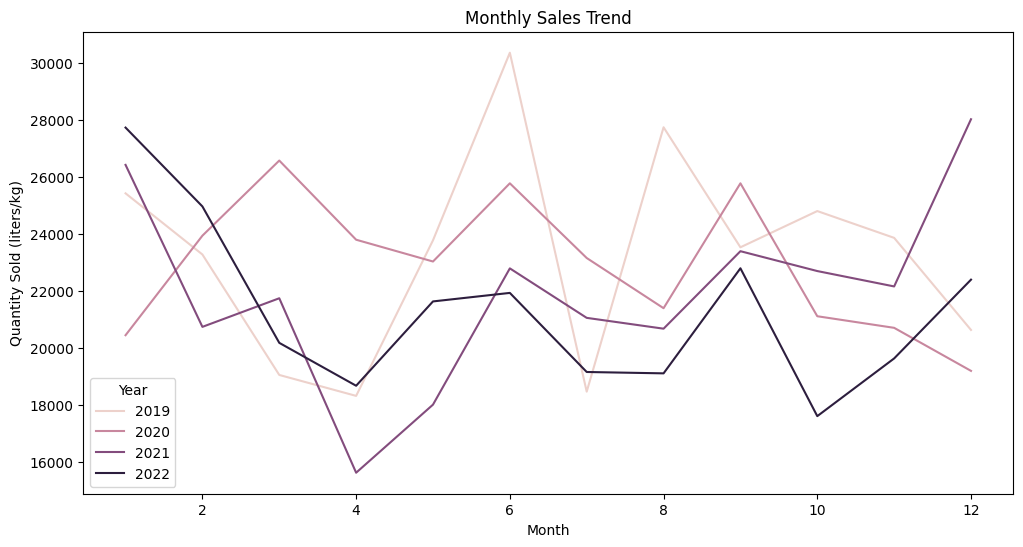

In [52]:
# Plot Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Quantity Sold (liters/kg)', hue='Year', data=monthly_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Quantity Sold (liters/kg)")
plt.legend(title="Year")
plt.show()

By determining the trends of each month it is easier to determine seasonality in the market and adjust the stock and promotion strategies.

 Product Performance

In [53]:
# Group by Product Name to get total sales for each product
product_sales = data.groupby('Product Name')['Quantity Sold (liters/kg)'].sum().sort_values(ascending=False).reset_index()

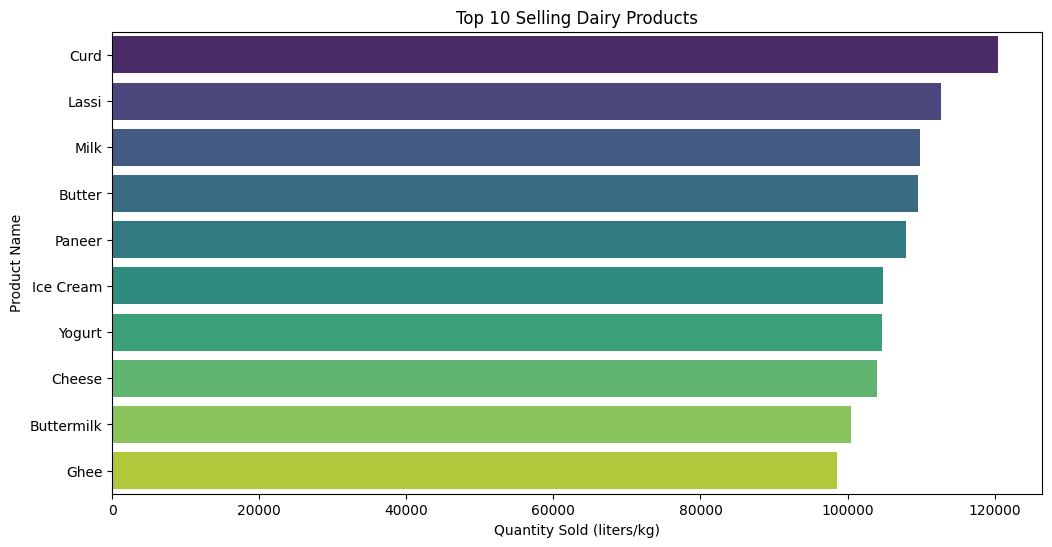

In [54]:
# Plot Product Performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity Sold (liters/kg)', y='Product Name', data=product_sales.head(10), palette='viridis')
plt.title("Top 10 Selling Dairy Products")
plt.xlabel("Quantity Sold (liters/kg)")
plt.ylabel("Product Name")
plt.show()

Understanding which products sell the most can help prioritize production and promotional efforts.

Seasonal Analysis

In [55]:
# Group by Product Category, Month to see seasonal sales patterns
seasonal_sales = data.groupby(['Product Name', 'Month'])['Quantity Sold (liters/kg)'].sum().reset_index()

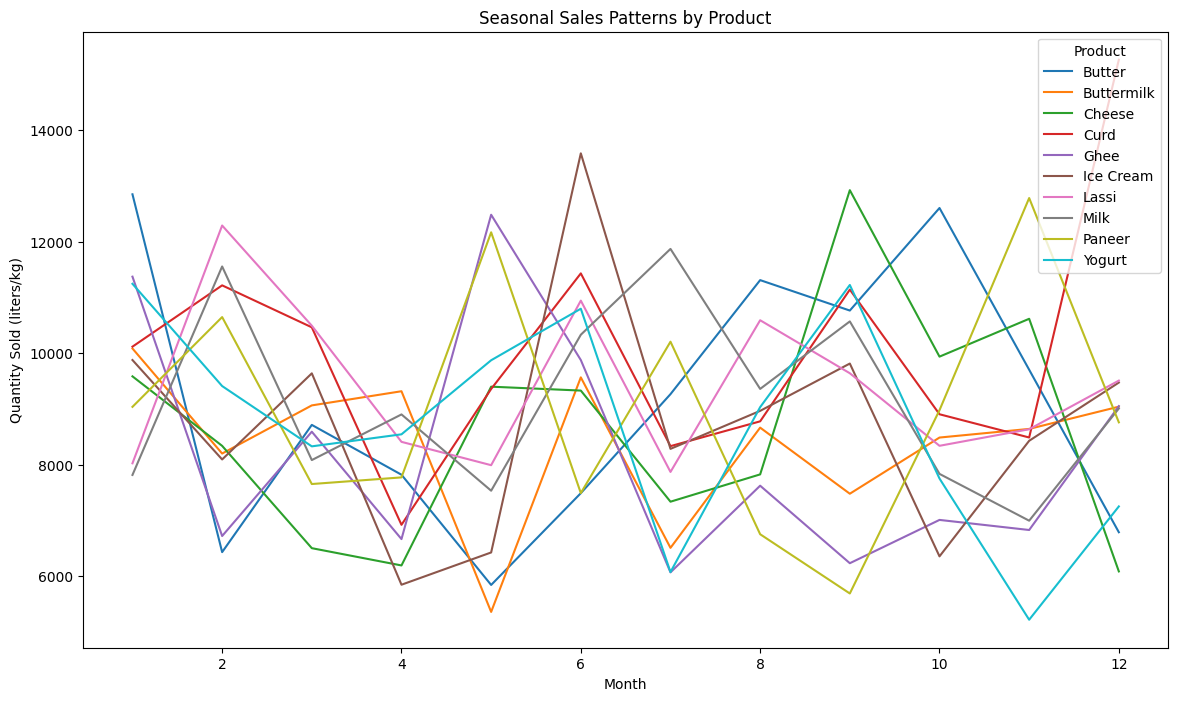

In [56]:
# Plot Seasonal Sales Patterns
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Quantity Sold (liters/kg)', hue='Product Name', data=seasonal_sales)
plt.title("Seasonal Sales Patterns by Product")
plt.xlabel("Month")
plt.ylabel("Quantity Sold (liters/kg)")
plt.legend(title="Product")
plt.show()

Identifying seasonality can help adjust marketing strategies and stock levels to meet demand during peak seasons.


Interactive Visualization

In [57]:
# Interactive Sales Trend Visualization by Product Name
fig = px.line(seasonal_sales, x="Month", y="Quantity Sold (liters/kg)", color="Product Name",
              title="Interactive Seasonal Sales Patterns by Product",
              labels={"Quantity Sold (liters/kg)": "Quantity Sold (liters/kg)", "Month": "Month"})
fig.show()

Interactive plots allow users to explore data more deeply, revealing insights that may not be immediately apparent in static charts.


##### Milestone 2 Code for Interactive Visualization Development
Analyzing Price Elasticity

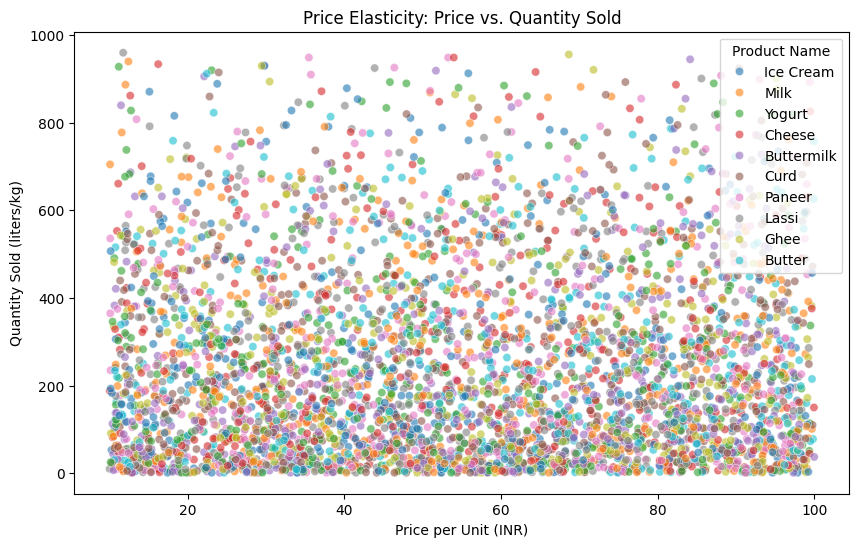

In [58]:
# Scatter plot for Price vs. Quantity Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price per Unit', y='Quantity Sold (liters/kg)', data=data, hue='Product Name', alpha=0.6)
plt.title("Price Elasticity: Price vs. Quantity Sold")
plt.xlabel("Price per Unit (INR)")
plt.ylabel("Quantity Sold (liters/kg)")
plt.legend(title="Product Name")
plt.show()

Understanding how changes in price affect sales volume can help optimize pricing strategies.


Regional Sales Performance

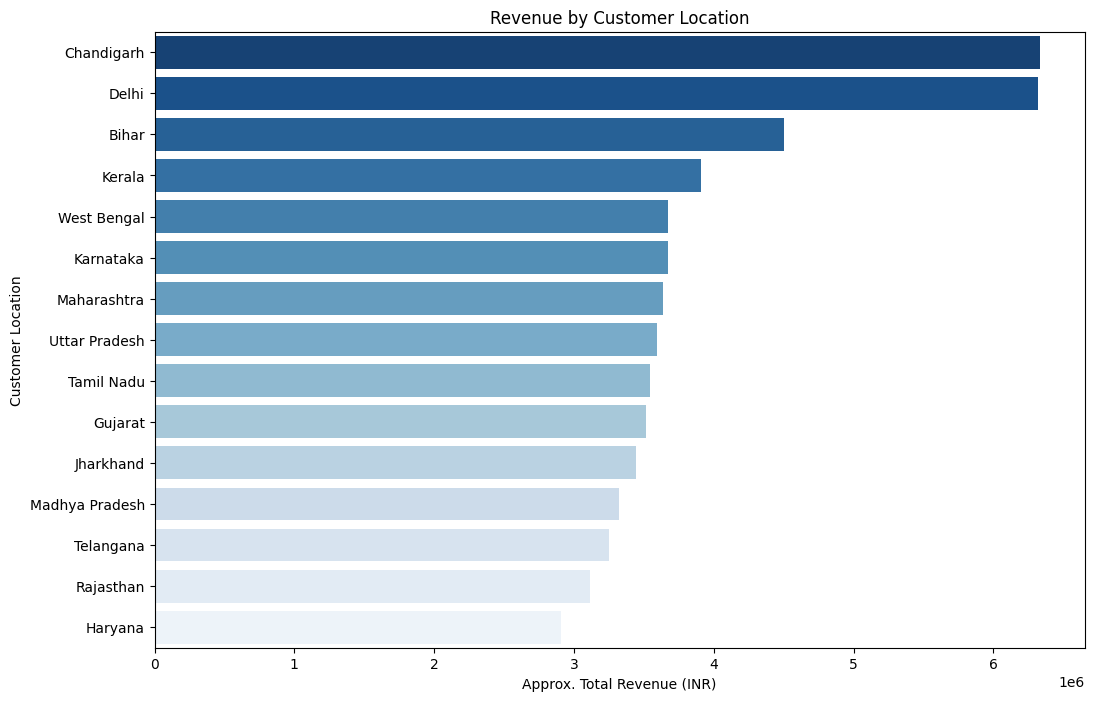

In [59]:
# Group by Customer Location to calculate total revenue
regional_sales = data.groupby('Customer Location')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False).reset_index()

# Plot total revenue by region
plt.figure(figsize=(12, 8))
sns.barplot(x='Approx. Total Revenue(INR)', y='Customer Location', data=regional_sales, palette='Blues_r')
plt.title("Revenue by Customer Location")
plt.xlabel("Approx. Total Revenue (INR)")
plt.ylabel("Customer Location")
plt.show()

Regional analysis can highlight areas with strong or weak sales, guiding targeted marketing or distribution efforts.


Stock and Reorder Analysis

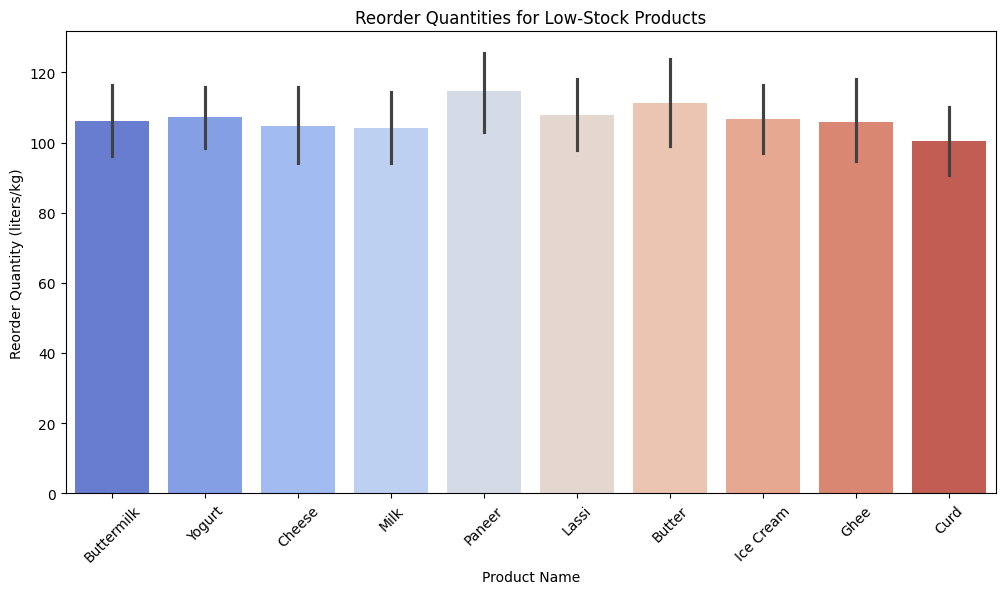

In [60]:
# Flag products with stock below the minimum threshold
data['Low Stock'] = data['Quantity in Stock (liters/kg)'] < data['Minimum Stock Threshold (liters/kg)']

# Plot the low-stock products and reorder quantity
low_stock_data = data[data['Low Stock']]
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Name', y='Reorder Quantity (liters/kg)', data=low_stock_data, palette='coolwarm')
plt.title("Reorder Quantities for Low-Stock Products")
plt.xlabel("Product Name")
plt.ylabel("Reorder Quantity (liters/kg)")
plt.xticks(rotation=45)
plt.show()

Monitoring stock levels helps avoid stockouts and ensures continuous product availability, which is vital for maintaining customer satisfaction.


Interactive Dashboards

In [61]:
# Interactive Regional Sales Revenue
fig = px.bar(regional_sales, x="Approx. Total Revenue(INR)", y="Customer Location", title="Interactive Revenue by Region",
             labels={"Approx. Total Revenue(INR)": "Revenue (INR)", "Customer Location": "Region"},
             color="Approx. Total Revenue(INR)", color_continuous_scale="Viridis")
fig.show()

# Price Elasticity Interactive Scatter
fig2 = px.scatter(data, x='Price per Unit', y='Quantity Sold (liters/kg)', color='Product Name',
                  title="Price vs Quantity Sold by Product",
                  labels={"Price per Unit": "Price (INR)", "Quantity Sold (liters/kg)": "Quantity Sold"})
fig2.show()


Reasons for Content and Structure of the Interactive Regional Sales Revenue Visualization
-The idea behind using this multi-tabbed user interface is to enable the stakeholders to determine which areas generate the most revenue.
- In particular, one can adjust a chart to see the precise revenue values for each particular region with a simple mouseover, thus increasing the effectiveness of the tool.
- This can in turn help in determining the amount of resources to be allocated in the region, and the best marketing strategies to use.


In [62]:
# Interactive Visualization: Stock Levels
fig3 = px.bar(data, x='Product Name', y='Quantity in Stock (liters/kg)', color='Low Stock',
              title="Current Stock Levels and Low Stock Status",
              labels={"Quantity in Stock (liters/kg)": "Stock Quantity", "Product Name": "Product"},
              color_discrete_map={True: "red", False: "green"})
fig3.show()

Rationale for the Stock Levels visualization
- This visualization is very helpful when it comes to tracking stock and making sure that some products are always in stock. This is critical as marking a low stock product in red ensures that the attention of the users is quickly drawn to areas of the supply chain that may require some action.
It helps in inventory management through highlighting those products that automatically indicate they have reached their minimum inventory level.


#### Performance Metrics

In [68]:
monthly_sales['Percentage Change'] = monthly_sales['Quantity Sold (liters/kg)'].pct_change().fillna(0) * 100
print(monthly_sales);

    Year  Month  Quantity Sold (liters/kg)  Percentage Change
0   2019      1                      25420           0.000000
1   2019      2                      23273          -8.446105
2   2019      3                      19045         -18.166975
3   2019      4                      18310          -3.859281
4   2019      5                      23771          29.825232
5   2019      6                      30356          27.701822
6   2019      7                      18459         -39.191593
7   2019      8                      27739          50.273579
8   2019      9                      23526         -15.188002
9   2019     10                      24798           5.406784
10  2019     11                      23857          -3.794661
11  2019     12                      20625         -13.547387
12  2020      1                      20440          -0.896970
13  2020      2                      23934          17.093933
14  2020      3                      26571          11.017799
15  2020

## Performance Metrics Visualization

### Percentage Change in Monthly Sales

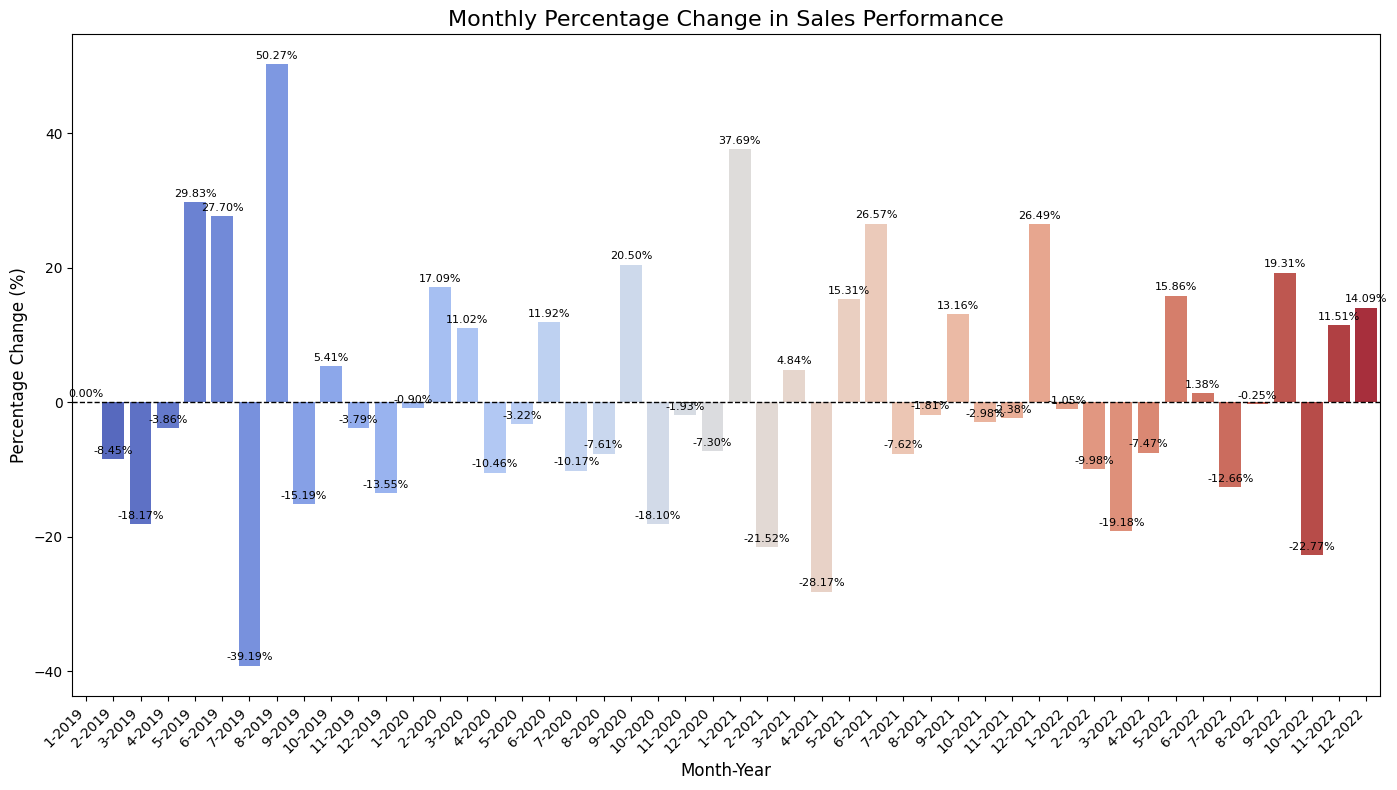

In [73]:
# Barplot to visualize monthly percentage change
plt.figure(figsize=(14, 8))
x_labels = [f"{month}-{year}" for month, year in zip(monthly_sales['Month'], monthly_sales['Year'])]

sns.barplot(
    x=x_labels,  # Use the formatted labels
    y=monthly_sales['Percentage Change'],
    palette='coolwarm'
)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Monthly Percentage Change in Sales Performance", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Percentage Change (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Align x-axis labels for better readability
plt.tight_layout()

# Annotate each bar with its percentage change value
for i, v in enumerate(monthly_sales['Percentage Change']):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', va='bottom', fontsize=8) # Added formatting for percentage

plt.show()


The bar plot with the label as ‘Monthly Percentage Change in Sales Performance.’  It means each bar indicates a month-year combination of data such as 1-2019 indicates data of January 2019. The height of the bar illustrates the percentage change on the sales quantity against the previous month.  Using a horizontal dashed line and placing it at 0% baseline.
Bars: Represent month-year combinations (e.g., 1-2019 for January 2019).

Positive Bars: Indicate sales growth compared to the previous month; higher bars = greater growth.

Negative Bars: Indicate a sales decline; longer bars = greater decrease.

Near-Zero Bars: Show minimal change from the previous month.

Horizontal Dashed Line: Positioned at 0% as a baseline to differentiate growth (above) from decline (below).

### Comparison of Yearly Sales Performance

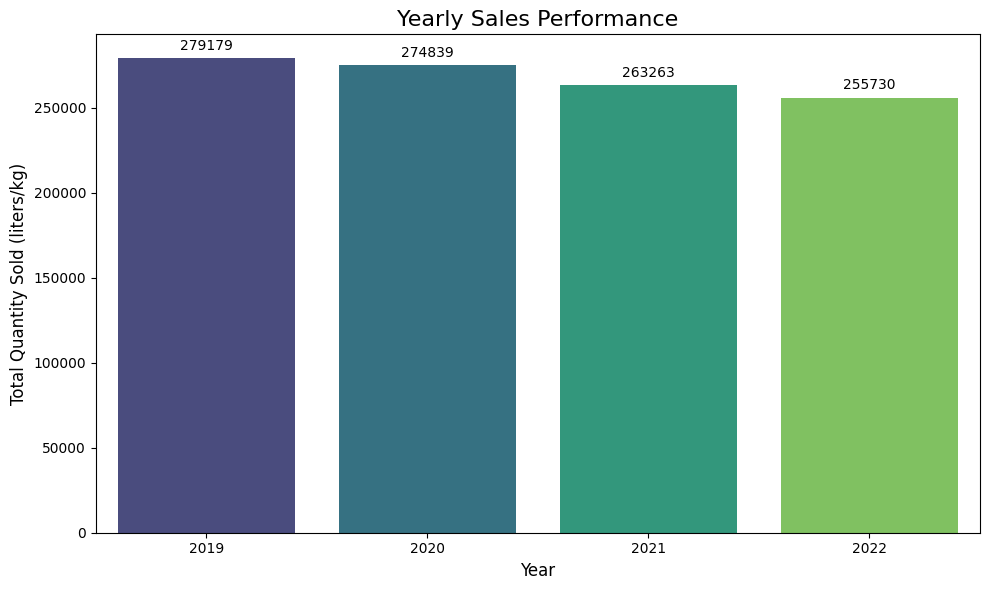

In [80]:
# Barplot for yearly sales performance
yearly_sales = monthly_sales.groupby('Year')['Quantity Sold (liters/kg)'].sum().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Year',
    y='Quantity Sold (liters/kg)',
    data=yearly_sales,
    palette='viridis'
)
plt.title("Yearly Sales Performance", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Quantity Sold (liters/kg)", fontsize=12)

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()

From the “Yearly Sales Performance” bar plot, one gets to know sales of dairy products (2019-2022) and measures on the bar give total quantities sold while values are added to make the understanding easy. The key components are the sales trajectory, year on year comparison, and large fluctuations for evaluating good or bad seasons. This more general level of analysis is useful for strategic planning because it identifies opportunities for change and models of good practice.

Overall Trends: Assess whether sales increased, decreased, or stayed stable over time.

Comparisons: Easily compare yearly sales performance.

Growth/Decline Analysis: Variations highlight years requiring deeper investigation into causes (e.g., market shifts, campaigns).

Strategic Input: Guide strategies by learning from successful years or addressing issues in weaker ones.

### Top Performing Customer Locations by Revenue

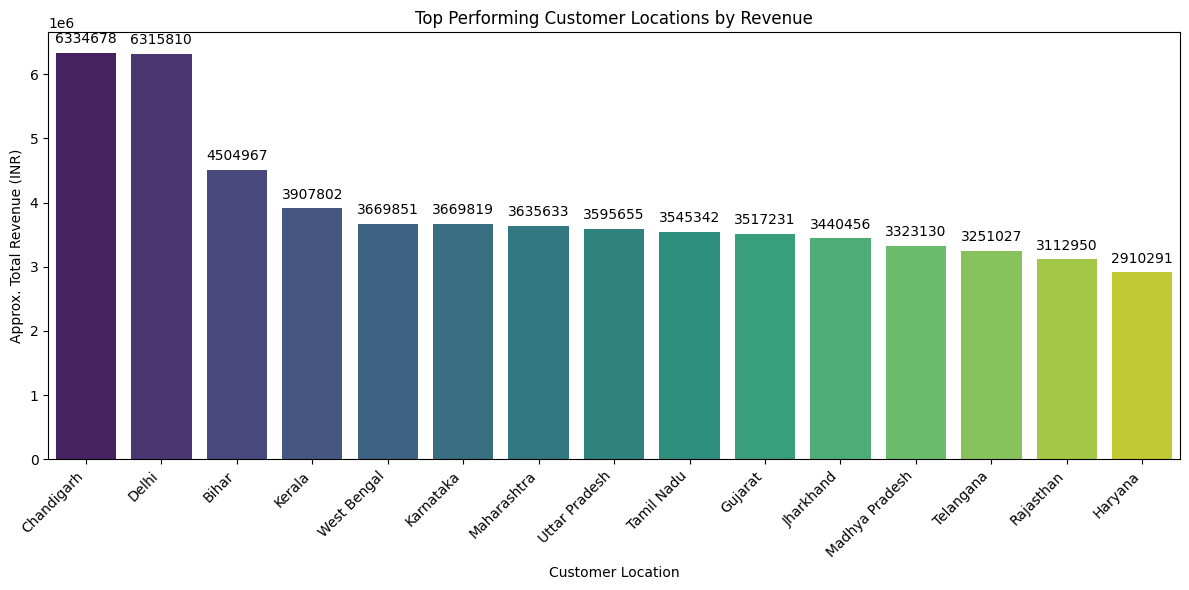

In [79]:
# Top Performing Customer Locations by Revenue
bar = data.groupby('Customer Location')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=bar.index, y=bar.values, palette='viridis')  # Use bar data

plt.title("Top Performing Customer Locations by Revenue")
plt.xlabel("Customer Location")
plt.ylabel("Approx. Total Revenue (INR)")
plt.xticks(rotation=45, ha='right')

# Annotate bars with revenue values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

The bar plot “Top Performing Customer Location by Revenue”.  The horizontal axis indicates various customer locations and the vertical axis shows the approximate total revenue for each location.  Total revenue of each location is represented on the y-axis where the height of each bar corresponds to the value of that bar as indicated on top of the bar. The plot uses the viridis color scheme.  It’s mostly achieved to be able to graphically pinpoint the customer locations that contribute most to the company’s revenue.

### Analyzing Seasonal Patterns

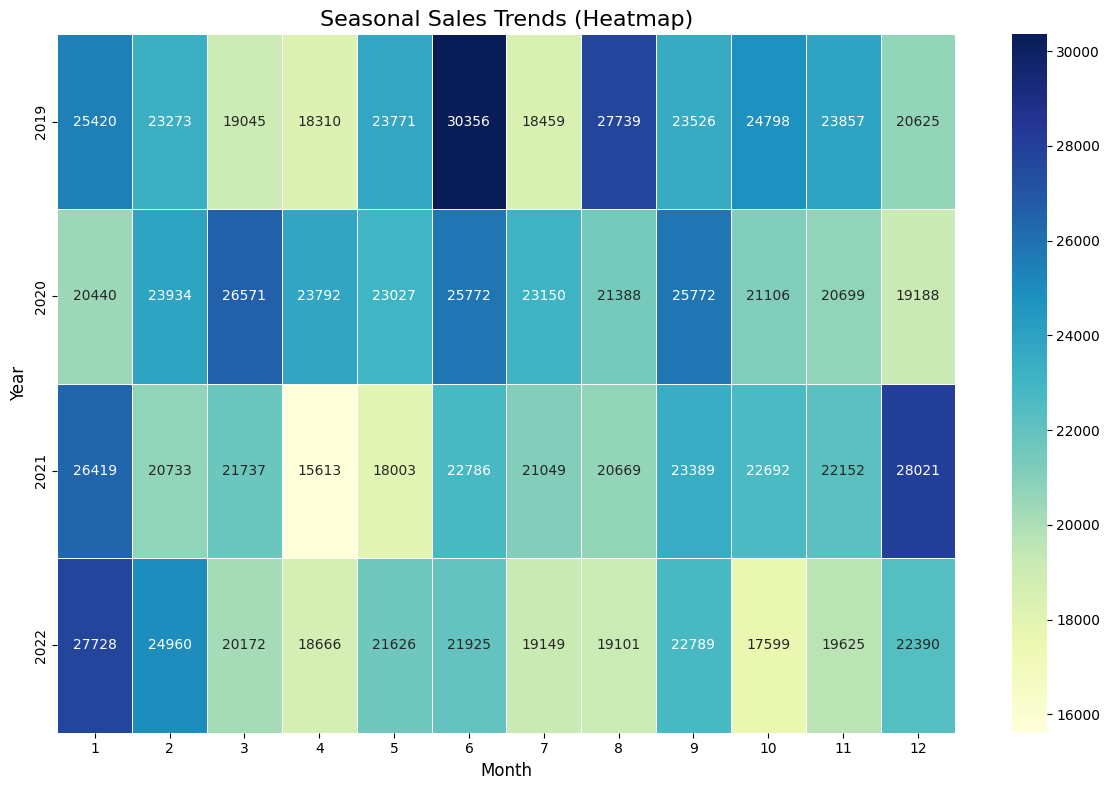

In [83]:
# Pivot table for seasonal pattern heatmap
seasonal_heatmap_data = monthly_sales.pivot(index="Year", columns="Month", values="Quantity Sold (liters/kg)")

# Heatmap for seasonal sales trends
plt.figure(figsize=(12, 8))
sns.heatmap(seasonal_heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Seasonal Sales Trends (Heatmap)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.tight_layout()
plt.show()

‘Seasonal Sales Trends’ heatmap gives information on sales quantity (in liters/kg) by displaying them by months of the year and per year.  It is quite clear to anyone that the darker shades of blue represented higher volumes of sales.  The heatmap brings out the ability to infers quickly on peak sales months and yearly trend. For instance, if a given month remains characterised by a darker blue shade in the course of different calendar years, it indicates that a given product is popular in a particular season. On the other hand, bright colors portray low sales which may be due to certain periods of the year or may also require the management to market the products more frequently.


### Insights from Price Elasticity Analysis

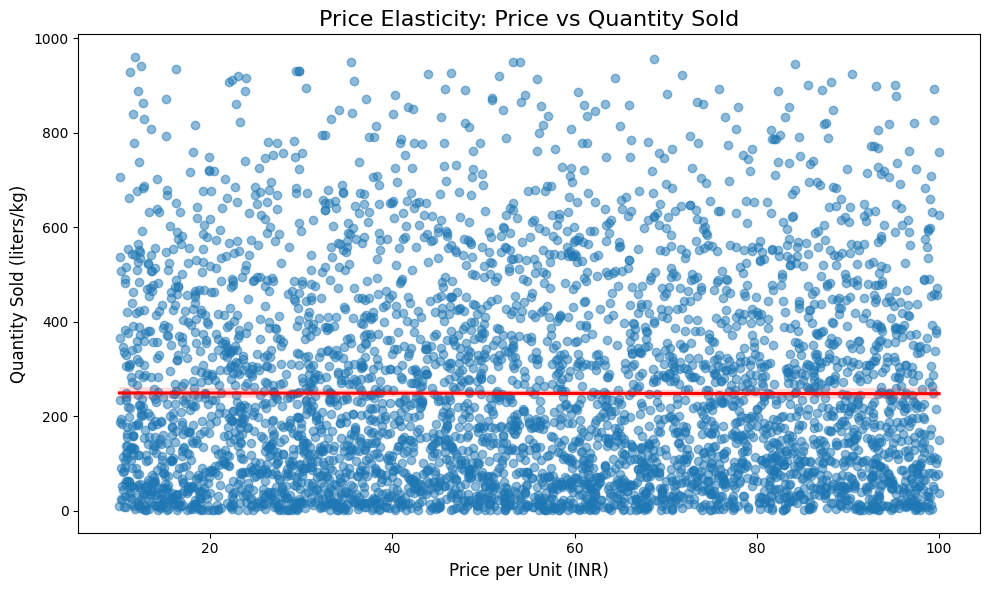

In [81]:
# Visualizing price vs quantity sold with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Price per Unit',
    y='Quantity Sold (liters/kg)',
    data=data,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title("Price Elasticity: Price vs Quantity Sold", fontsize=16)
plt.xlabel("Price per Unit (INR)", fontsize=12)
plt.ylabel("Quantity Sold (liters/kg)", fontsize=12)
plt.tight_layout()
plt.show()


The scatter plot "Price Elasticity: Price vs. Quantity Sold" figures demonstrate the overall pricing trend of dairy products and the quantities of the products sold to consumers.  Each point indicates a sale and the name of the product is represented by the colour.  In an ideal world, such a relationship would be inversely so with higher prices, lower quantity sold or vice versa.